In [115]:
# 導入所需使用到的套件

# 導入 Python 進行資料處理之套件 Pandas，並把它另為 pd 
import pandas as pd
# 導入 Python 處理數值之套件 mumpy，並把它另為 np
import numpy as np
# 繪圖
import matplotlib.pyplot as plt
# 導入 Python 處理時間套件
import time

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

In [116]:
df = pd.read_csv('dftrain0317.csv')
df = df.drop(['Unnamed: 0','土地位置建物門牌','交易年月日','建築完成年月','主要用途','車位數量',
             'new_date','address','longitude','latitude'],axis=1)

In [117]:
# 權重
x = df.drop(['總價元'],axis=1)

# 標籤
y = df['總價元']

In [118]:
# 先將 x, y 依照 80%、20% 的比例分割成 訓練集與測試集
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# 再將訓練集依照 75%、25% 的比例分割成 訓練集與驗證集 => 訓練集、驗證集、測試集比例為 60%、20%、20%
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# 將 x_train、x_test、x_val 轉換成 numpy 格式
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [119]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [120]:
def compute_errors(y,pred):
    
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    
    error_names = ['RMSE', 'R^2']
    errors = [rmse, r2]
    
    for name, error in zip(error_names, errors):
        print(f'{name} : {error:.6f}')

In [121]:
# 紀錄開始時間
start = time.time()

# 訓練模型
train_model1 = RandomForestRegressor(random_state=42).fit(x_train, y_train)

# 紀錄結束時間
end = time.time()

# 顯示執行時間
print(f'Execution time : {end - start :.3f} seconds')

Execution time : 147.488 seconds


In [122]:
# 預測測試集
train_pred1 = train_model1.predict(x_test)

# 預測驗證集
val_pred1 = train_model1.predict(x_val)

In [123]:
# 查看實驗一誤差
print('----------Experiment 1----------')
print('Training Error')
compute_errors(y_test, train_pred1)
print('--------------------------------')
print('Valid Error') 
compute_errors(y_val, val_pred1)
print('--------------------------------')

----------Experiment 1----------
Training Error
RMSE : 164.568875
R^2 : 0.862948
--------------------------------
Valid Error
RMSE : 162.001809
R^2 : 0.867157
--------------------------------


In [124]:
# 特徵權重
feature_importances = train_model1.feature_importances_

In [125]:
# 讓權重由大到小排列

# 創一個空字典 f 儲存特徵與該權重
f = {}

for feature, importance in zip(list(x), list(feature_importances)):
    f[feature] = importance

# 讓權重由大到小排列
sorted_features = sorted(f.items(), key=lambda i: i[1])

for feature, importance in sorted_features:
    print(f'{feature} : {importance}')
    print('-------------------------------------------------')

建物現況格局-隔間 : 0.00028404933231914906
-------------------------------------------------
建物數量 : 0.0006112175125053929
-------------------------------------------------
有無管理組織 : 0.0010107584598277116
-------------------------------------------------
主要建材 : 0.0017680920474587275
-------------------------------------------------
移轉層次 : 0.0018152081088354394
-------------------------------------------------
土地數量 : 0.0037938195318242772
-------------------------------------------------
經濟成長率(%) : 0.004181262410895158
-------------------------------------------------
五大行庫平均房貸利率(%) : 0.0043758389772701
-------------------------------------------------
都市土地使用分區 : 0.004388693503401657
-------------------------------------------------
建物現況格局-廳 : 0.0049510427683014
-------------------------------------------------
建物現況格局-房 : 0.006998472472511845
-------------------------------------------------
建物現況格局-衛 : 0.007302226052727981
-------------------------------------------------
陽台坪數 : 0.0077083706976186

In [ ]:
# 這邊要先下載套件，並由套件去下載中文字體，如果你是第一次執行，就直接執行這個 Cell，如果不是，直接執行下一個 Cell 就好
# 不然預設儲存檔案的資料夾會有許多 ChineseFont.ttf 檔案


# 需要先下載 wget 套件，如需下載，把程式碼前的 # 刪除
# pip install wget


# 下載中文字，讓 Python 在圖上顯示中文字
import wget
import matplotlib as mpl 
from matplotlib.font_manager import fontManager
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

In [126]:
# 第二次執行，直接執行這邊，上面可以 Command 掉
import matplotlib as mpl 
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

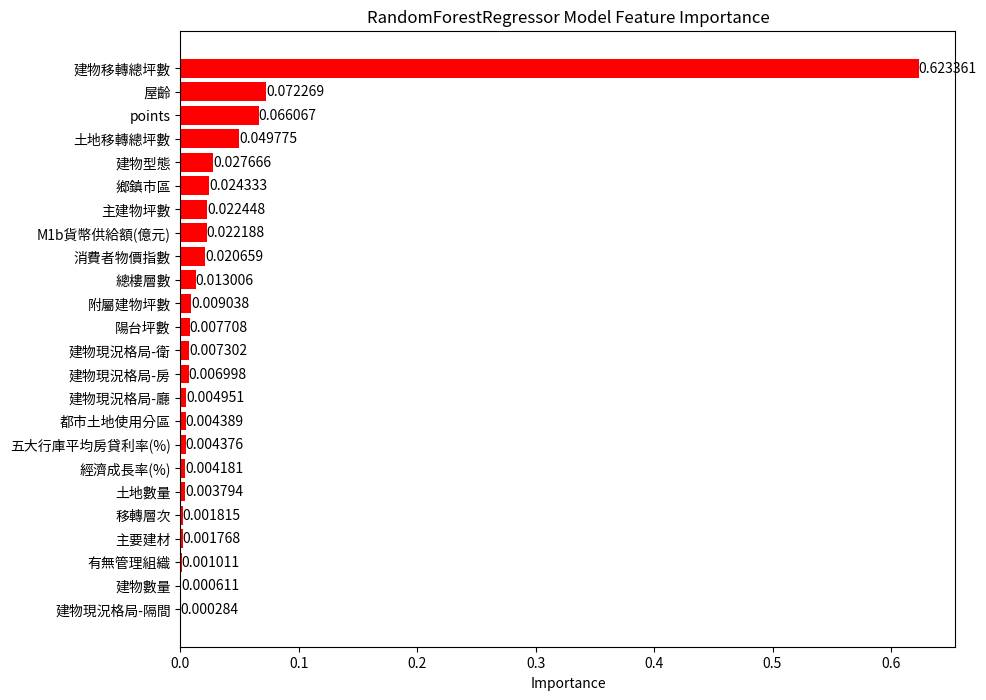

In [136]:
features, importances = zip(*sorted_features)

plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='red')
plt.xlabel('Importance')
plt.title('RandomForestRegressor Model Feature Importance')


for index, value in enumerate(importances):
    plt.text(value, index, f'{value:.6f}', va='center')

plt.savefig('rfrfi.png')
plt.show()

In [128]:
median_fi = np.median(feature_importances)
x_train_new = x_train[:,feature_importances >= median_fi]
x_test_new = x_test[:,feature_importances >= median_fi]
x_val_new = x_val[:,feature_importances >= median_fi]

In [135]:
median_fi

0.007505298375173299

In [129]:
# 紀錄開始時間
start = time.time()

# 訓練模型
train_model2 = RandomForestRegressor(random_state=42).fit(x_train_new, y_train)

# 紀錄結束時間
end = time.time()

# 顯示執行時間
print(f'Execution time : {end - start :.6f} seconds')

Execution time : 120.130331 seconds


In [130]:
# 預測測試集
train_pred2 = train_model2.predict(x_test_new)
# 預測驗證集
val_pred2 = train_model2.predict(x_val_new)

In [131]:
# 查看實驗二誤差
print('----------Experiment 2----------')
print('Training Error')
compute_errors(y_test, train_pred2)
print('--------------------------------')
print('Valid Error') 
compute_errors(y_val, val_pred2)
print('--------------------------------')

----------Experiment 2----------
Training Error
RMSE : 168.316809
R^2 : 0.856634
--------------------------------
Valid Error
RMSE : 166.094951
R^2 : 0.860359
--------------------------------


In [88]:
# 紀錄開始時間
start = time.time()

# 設定折數為10，每次抽取為隨機抽樣
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# 設定搜索範圍
param_dict = { 
    'criterion': ['squared_error','absolute_error','friedman_mse', 'poisson'],
    'n_estimators': list(range(100,1001,50)),
    'max_depth': [None] + list(range(5,31,5)),
    'min_samples_leaf':list(range(1,11,3)),
    'min_samples_split':list(range(2,11,2)),
    'max_features':[None,'sqrt','log2'] + list(range(1,25,3))
    }

# 搜索 20 次，以 -MSE 計算每一個折數的驗證集誤差
rscv = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                          param_distributions=param_dict,
                          n_iter=20,
                          cv=cv, 
                          scoring='neg_mean_squared_error', 
                          random_state=42)

rscv.fit(x_train_new, y_train)

# 顯示10折之誤差
print(f'The best model score : {np.sqrt(-rscv.best_score_):.6f}')

# 顯示搜索結果
print('The best model param :', rscv.best_params_)

# 紀錄結束時間
end = time.time()

# 顯示執行時間
print(f'Execution time : {end - start :.6f} seconds')

The best model score : 165.985468
The best model param : {'n_estimators': 550, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'squared_error'}
Execution time : 650235.817688 seconds


In [90]:
# 紀錄開始時間
start = time.time()

# 設定折數為10，每次抽取為隨機抽樣
cv = KFold(n_splits=10, shuffle=True, random_state=42)

param_dict = {
    'criterion':['squared_error'],
    'n_estimators':[540,545,550,555,560],
    'max_depth':[None],
    'max_features':['log2'],
    'min_samples_leaf':[1,2],
    'min_samples_split':[2,3]
}

gscv = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_dict, 
                    cv=cv, 
                    scoring='neg_mean_squared_error')

gscv.fit(x_train_new, y_train)

print(f'The best model score : {np.sqrt(-gscv.best_score_):.6f}')
print('The best model params :', gscv.best_params_)

# 紀錄結束時間
end = time.time()

# 顯示執行時間
print(f'Execution time : {end - start :.6f} seconds')

The best model score : 165.967966
The best model params : {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 540}
Execution time : 29588.238663 seconds


In [132]:
# 紀錄開始時間
start = time.time()

train_model3 = RandomForestRegressor(criterion='squared_error',
                                     max_depth=None,
                                     max_features='log2',
                                     min_samples_leaf=1,
                                     min_samples_split=2,
                                     n_estimators=540,
                                     random_state=42)

train_model3.fit(x_train_new, y_train)

# 紀錄結束時間
end = time.time()

# 顯示執行時間
print(f'Execution time : {end - start :.6f} seconds')

Execution time : 195.320472 seconds


In [133]:
# 預測測試集
train_pred3 = train_model3.predict(x_test_new)
# 預測驗證集
val_pred3 = train_model3.predict(x_val_new)

In [134]:
print('----------Experiment 3----------')
print('Training Error')
compute_errors(y_test, train_pred3)
print('--------------------------------')
print('Valid Error') 
compute_errors(y_val, val_pred3)
print('--------------------------------')

----------Experiment 3----------
Training Error
RMSE : 165.626050
R^2 : 0.861181
--------------------------------
Valid Error
RMSE : 162.230647
R^2 : 0.866781
--------------------------------


In [96]:
df112 = pd.read_csv('dfvalid0317.csv')
df112.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15916 entries, 0 to 15915
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     15916 non-null  int64  
 1   鄉鎮市區           15916 non-null  int64  
 2   土地位置建物門牌       15916 non-null  object 
 3   土地移轉總坪數        15916 non-null  float64
 4   都市土地使用分區       15916 non-null  int64  
 5   交易年月日          15916 non-null  object 
 6   移轉層次           15916 non-null  int64  
 7   總樓層數           15916 non-null  int64  
 8   建物型態           15916 non-null  int64  
 9   主要用途           15916 non-null  object 
 10  主要建材           15916 non-null  int64  
 11  建築完成年月         15916 non-null  object 
 12  建物移轉總坪數        15916 non-null  float64
 13  建物現況格局-房       15916 non-null  int64  
 14  建物現況格局-廳       15916 non-null  int64  
 15  建物現況格局-衛       15916 non-null  int64  
 16  建物現況格局-隔間      15916 non-null  int64  
 17  有無管理組織         15916 non-null  int64  
 18  總價元   

In [97]:
df112 = df112.drop(['Unnamed: 0','土地位置建物門牌','交易年月日','建築完成年月','主要用途','車位數量',
             'new_date','address','longitude','latitude'],axis=1)

In [98]:
new_data = df112.drop(['總價元'],axis=1)

In [99]:
selected_columns = new_data.columns[feature_importances >= median_fi]
new_data = new_data[selected_columns]

In [100]:
scaler = StandardScaler().fit(new_data)
new_data = scaler.transform(new_data)

In [101]:
start = time.time()
new_data_pred = train_model3.predict(new_data)

print('Test new data')
print(compute_errors(df112['總價元'], new_data_pred))

end = time.time()

print(f'Execution time : {end - start :.3f} seconds')

Test new data
RMSE : 279.523733
R^2 : 0.692513
None
Execution time : 2.417 seconds
